In [30]:
import warnings 
warnings.filterwarnings('ignore')

In [31]:
path = '/home/murilo/workspace/tcc/tcc/python_model/database'

x_train_path = f'{path}/x_train.csv'
y_train_path = f'{path}/y_train.csv'
x_test_path = f'{path}/x_test.csv'
y_test_path = f'{path}/y_test.csv'

In [32]:
import pandas as pd

X_train = pd.read_csv(x_train_path)
y_train = pd.read_csv(y_train_path)
X_test = pd.read_csv(x_test_path)
y_test = pd.read_csv(y_test_path)

In [33]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)

def inverse_transform(predictions, mean, scale):
    predictions = predictions * scale + mean
    return np.expm1(predictions)

cloro_mean, cloro_scale = 2.7378255142446153, 0.504330768563497

def build_and_evaluate(hidden_neurons):
    inputs = tf.keras.layers.Input(shape=(X_train.shape[1],), name='Input_Layer')
    hidden = tf.keras.layers.Dense(hidden_neurons, activation='relu', name='Hidden_Layer')(inputs)
    outputs = tf.keras.layers.Dense(1, name='Output_Layer')(hidden)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f"MLP_Model_with_{hidden_neurons}_Neurons")
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
    y_pred = model.predict(X_test).flatten()
    y_pred_reverted = inverse_transform(y_pred, cloro_mean, cloro_scale)
    y_test_reverted = inverse_transform(y_test.values.flatten(), cloro_mean, cloro_scale)
    

    mse = mean_squared_error(y_test_reverted, y_pred_reverted)
    print(f"Hidden Layer Size {hidden_neurons}: Mean MSE (reverted) = {mse:.4f}")
    
    return model, mse, y_test_reverted, y_pred_reverted

best_model = None
best_mse = float('inf')
results = {}

for neurons in range(2, 11):
    model, mse, y_test_reverted, y_pred_reverted = build_and_evaluate(neurons)
    results[neurons] = mse
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_y_test_reverted = y_test_reverted
        best_y_pred_reverted = y_pred_reverted

best_model.save('mlp_model.h5')
print(f"Best model saved with MSE (reverted) = {best_mse:.4f}")

2/2 [==============================] - 0s 2ms/step
Hidden Layer Size 2: Mean MSE (reverted) = 4.9961
2/2 [==============================] - 0s 3ms/step
Hidden Layer Size 3: Mean MSE (reverted) = 4.2748
2/2 [==============================] - 0s 2ms/step
Hidden Layer Size 4: Mean MSE (reverted) = 7.8648
2/2 [==============================] - 0s 2ms/step
Hidden Layer Size 5: Mean MSE (reverted) = 23.9995
2/2 [==============================] - 0s 2ms/step
Hidden Layer Size 6: Mean MSE (reverted) = 3.3389
2/2 [==============================] - 0s 4ms/step
Hidden Layer Size 7: Mean MSE (reverted) = 2.7809
2/2 [==============================] - 0s 8ms/step
Hidden Layer Size 8: Mean MSE (reverted) = 3.5164
2/2 [==============================] - 0s 5ms/step
Hidden Layer Size 9: Mean MSE (reverted) = 2.9932
2/2 [==============================] - 0s 3ms/step
Hidden Layer Size 10: Mean MSE (reverted) = 5.6726
Best model saved with MSE (reverted) = 2.7809


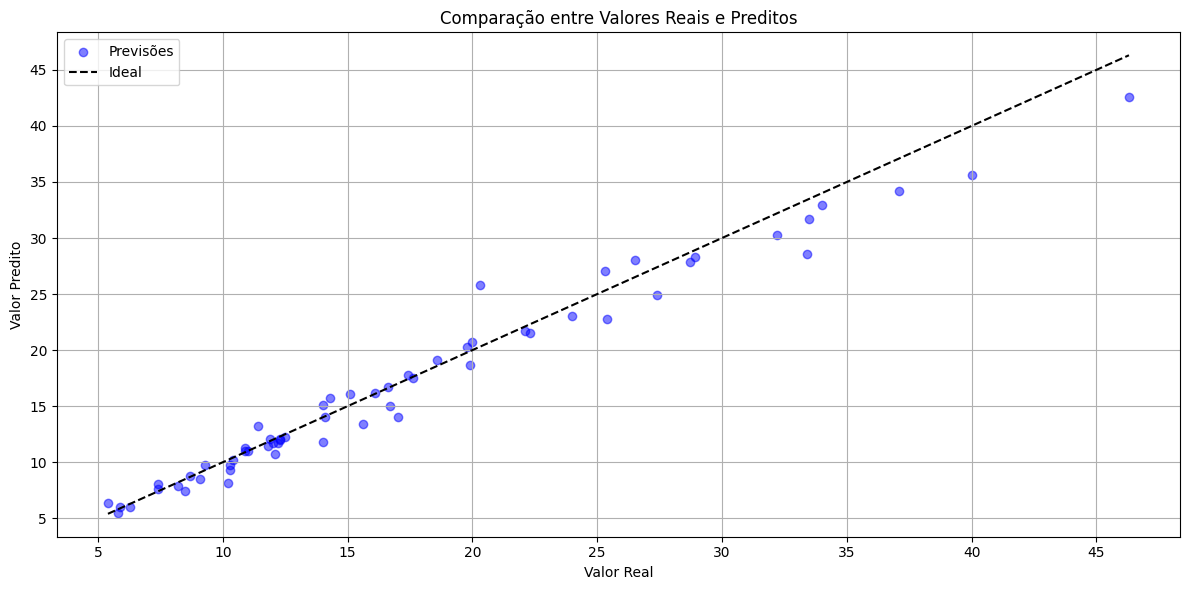

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(best_y_test_reverted, best_y_pred_reverted, color='blue', alpha=0.5, label='Previsões')
plt.plot([min(best_y_test_reverted), max(best_y_test_reverted)], 
         [min(best_y_test_reverted), max(best_y_test_reverted)], 'k--', label='Ideal')

plt.title('Comparação entre Valores Reais e Preditos')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
best_model.summary()

Model: "MLP_Model_with_7_Neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 2)]               0         
                                                                 
 Hidden_Layer (Dense)        (None, 7)                 21        
                                                                 
 Output_Layer (Dense)        (None, 1)                 8         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
